In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('max_columns', None)

In [2]:
df= pd.read_csv('train.csv')
df = df.drop(['Unnamed: 21','Unnamed: 22'], axis=1)

print(df.shape)
df.head()

(36871, 21)


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd,generation,state,zipcode
0,8054,25,admin.,single,tertiary,no,11924,no,no,unknown,13,jan,4102,32.0,144,8.0,failure,1,Millennials,MT,59776
1,5886,23,housemaid,divorced,primary,no,398,yes,no,cellular,20,jun,66,4.0,15,4.0,unknown,1,Millennials,OH,45438
2,3542,74,unknown,married,unknown,no,2177,yes,no,unknown,19,may,10,3.0,465,4.0,failure,0,Silent Generation,PR,776
3,32553,60,housemaid,married,tertiary,no,26673,yes,no,cellular,6,oct,3902,17.0,396,6.0,unknown,1,Older Boomers,WI,54537
4,11020,32,entrepreneur,single,primary,no,6358,no,yes,unknown,15,feb,3563,28.0,314,24.0,failure,0,Millennials,MP,96952


In [3]:
df['job'] = df['job'].str.lower()



# Dictionary of correct spellings
education_correct_spellings = {
    'primery': 'primary',
    'secendary': 'secondary'
}

# Replace mispelled values
df['education'] = df['education'].replace(education_correct_spellings)



# Dictionary of correct spellings and capitalizations
correct_generations = {
    'millennials': 'Millennials',
    'gen x': 'Gen X',
    'silent generation': 'Silent Generation',
    'older boomers': 'Older Boomers',
    'Millenials': 'Millennials',  # Misspelled version
    'oler boomers': 'Older Boomers'  # Misspelled version
}

# Replace incorrect values
df['generation'] = df['generation'].replace(correct_generations)


In [4]:
df.isnull().sum()

id              0
age             0
job            52
marital       426
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        9
pdays           0
previous      377
poutcome        0
cd              0
generation    274
state           0
zipcode         0
dtype: int64

In [5]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'cd', 'generation', 'state',
       'zipcode'],
      dtype='object')

In [6]:
num_vars = ['age','balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cat_vars = []
for i in df.columns:
    if i not in num_vars and i not in ['id', 'zipcode', 'y']:
        cat_vars.append(i)
print(num_vars, '\n', cat_vars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'cd', 'generation', 'state']


In [7]:
for i in num_vars:
    print(i)
    df[i] = df[i].astype('float64')

age
balance
day
duration
campaign
pdays
previous


In [8]:
df['job'].replace(to_replace = 'NULL', value = 'unknown', inplace=True)
df['marital'].replace(to_replace = 'NULL', value = df.marital.mode()[0], inplace=True)
df['generation'].replace(to_replace = 'NULL', value = df.generation.mode()[0], inplace=True)

df = df.dropna()

<AxesSubplot:>

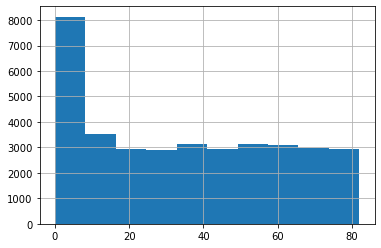

In [10]:
(df['duration']/60).hist()

In [11]:
df[df.previous == 0].cd.value_counts(normalize = True)

0    0.814861
1    0.185139
Name: cd, dtype: float64

In [12]:
df[df.previous != 0.0].cd.value_counts(normalize = True)

0    0.76199
1    0.23801
Name: cd, dtype: float64

In [9]:
df['new_customers'] = np.where(df.previous == 0, 'yes', 'no')
cat_vars.append('new_customers')

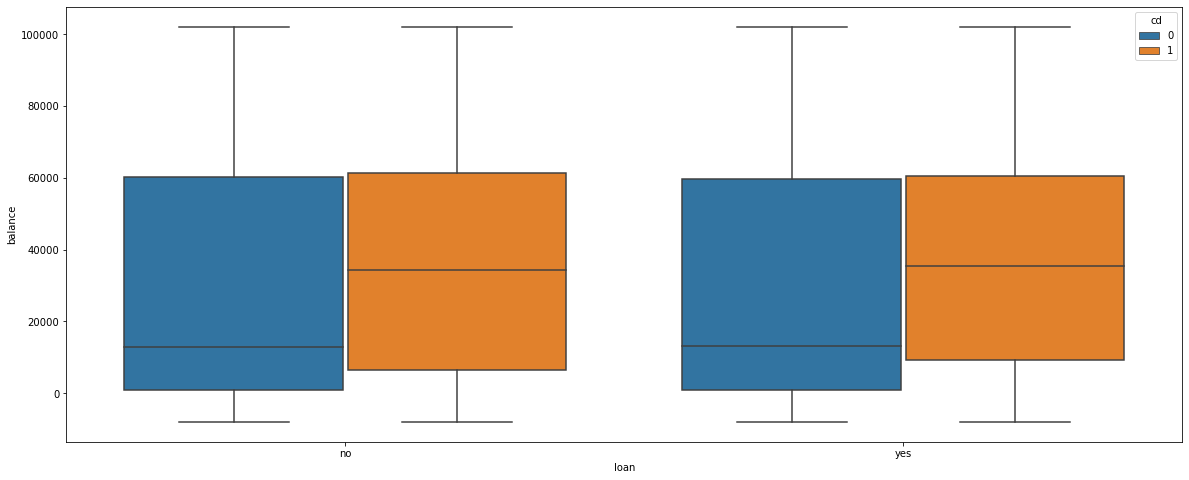

In [14]:
plt.subplots(figsize = (20,8))
sns.boxplot(x = 'loan', y = 'balance', hue = 'cd', data = df);

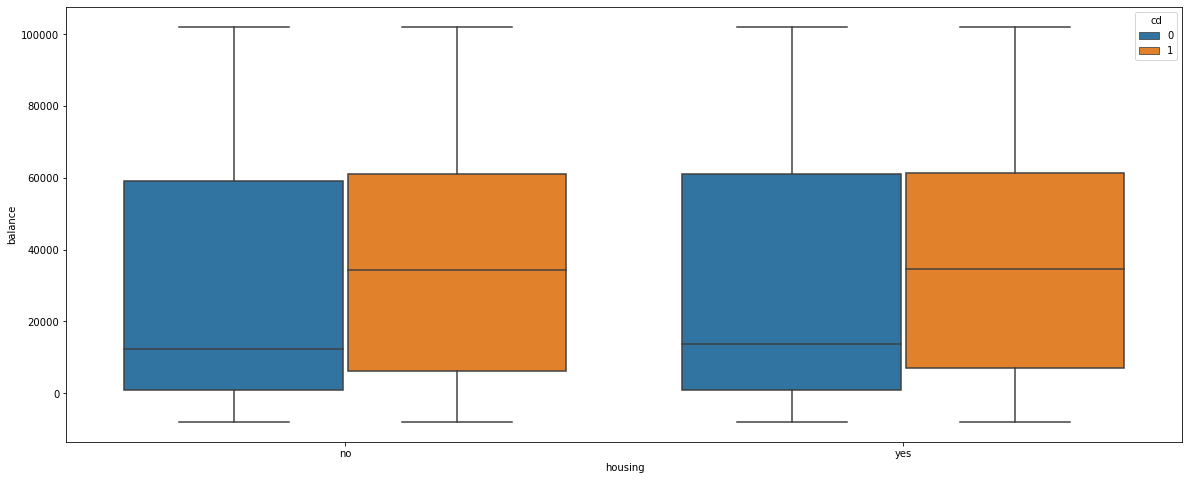

In [15]:
plt.subplots(figsize = (20,8))
sns.boxplot(x = 'housing', y = 'balance', hue = 'cd', data = df);

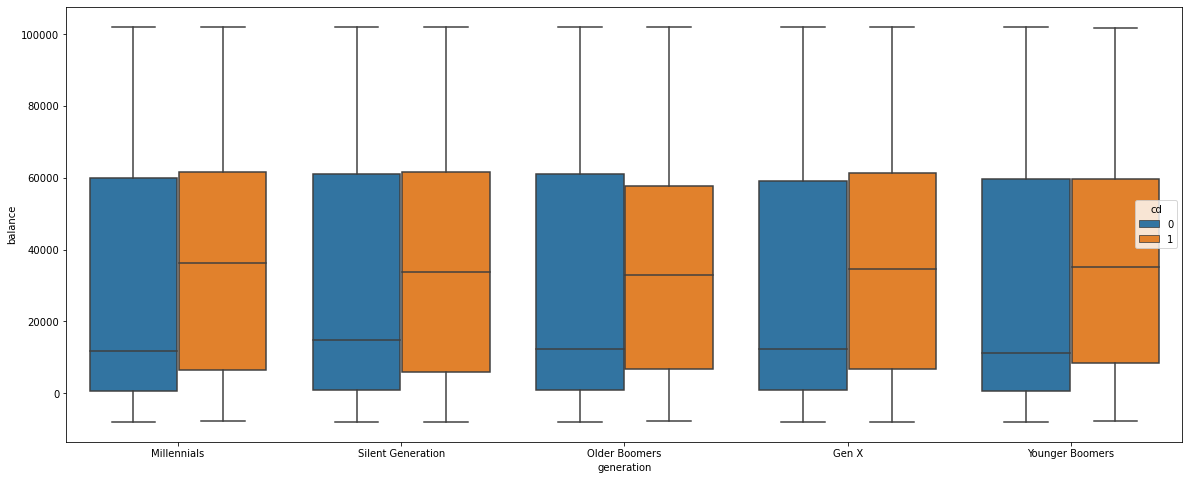

In [16]:
plt.subplots(figsize = (20,8))
sns.boxplot(x = 'generation', y = 'balance', hue = 'cd', data = df);

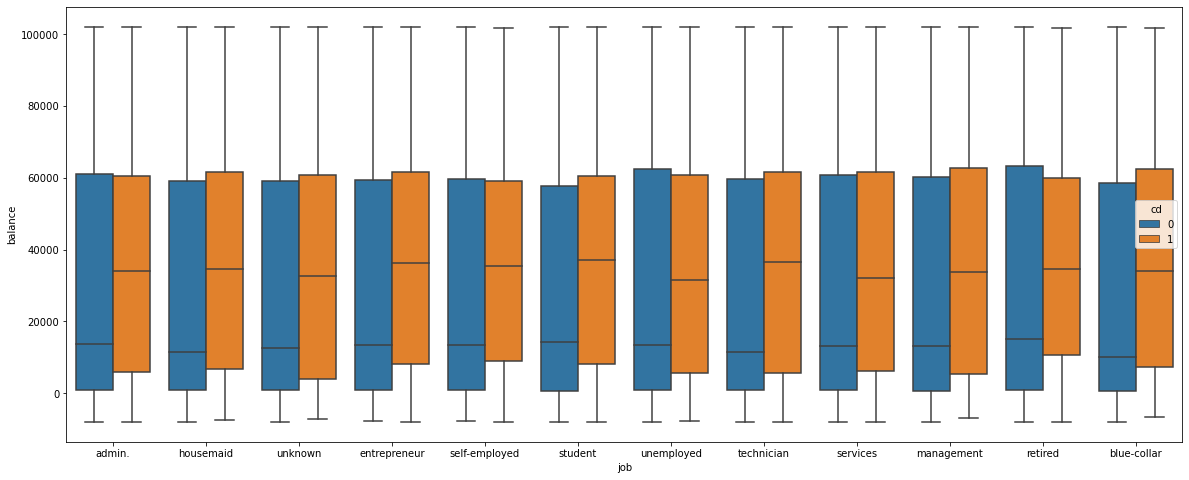

In [17]:
plt.subplots(figsize = (20,8))
sns.boxplot(x = 'job', y = 'balance', hue = 'cd', data = df);

In [10]:
# ML classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


# feature selection
from sklearn.feature_selection import RFECV


# metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import itertools

# tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score,roc_auc_score, make_scorer

# miscellaneous
import math


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, cross_val_predict

from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, auc

In [26]:
cat_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'cd',
 'generation',
 'state',
 'new_customers']

In [12]:
# Scaling Numerical Features
scaler = StandardScaler()

df_num_vars = pd.DataFrame(scaler.fit_transform(df[num_vars]))
df_num_vars.columns = num_vars

# Encode Categorical Features
encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 
            'loan', 'contact', 'month', 'poutcome', 'new_customers', 
            'generation'
            , 'state'
           ]

df_encoded = pd.get_dummies(df[cat_cols])

# Replace Categotical Data with Encoded Data
df_model = pd.concat([df_encoded, df_num_vars, df['cd']], axis=1)


print('Shape of dataframe:', df_model.shape)
df_model.head()

Shape of dataframe: (36838, 118)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,new_customers_no,new_customers_yes,generation_Gen X,generation_Millennials,generation_Older Boomers,generation_Silent Generation,generation_Younger Boomers,state_AK,state_AL,state_AR,state_AS,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_FM,state_GA,state_GU,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MH,state_MI,state_MN,state_MO,state_MP,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_PR,state_PW,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,age,balance,day,duration,campaign,pdays,previous,cd
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.409348,-0.581618,-0.358225,1.299451,0.635150,-0.750578,-0.454099,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.499852,-0.931325,0.461668,-1.329041,-1.002983,-1.384223,-0.548332,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.808011,-0.877349,0.344540,-1.365511,-1.061488,0.826167,-0.548332,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.174480,-0.134123,-1.178118,1.169199,-0.242421,0.487241,-0.501216,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.092582,-0.750495,-0.123970,0.948421,0.401131,0.084459,-0.077167,0.0


In [13]:
print(df_model.isnull().any().sum())
df_model = df_model.dropna()
df_model.isnull().any().sum()

118


0

In [14]:
X = df_model.drop(['cd'], axis=1)
Y = df_model['cd']
print("list of all features = ", "\n", "="*100, "\n"
      , df_model.columns.values, "\n", "="*100)

list of all features =  
 ['job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_divorced' 'marital_married' 'marital_single' 'education_primary'
 'education_secondary' 'education_tertiary' 'education_unknown'
 'default_no' 'default_yes' 'housing_no' 'housing_yes' 'loan_no'
 'loan_yes' 'contact_cellular' 'contact_telephone' 'contact_unknown'
 'month_apr' 'month_aug' 'month_dec' 'month_feb' 'month_jan' 'month_jul'
 'month_jun' 'month_mar' 'month_may' 'month_nov' 'month_oct' 'month_sep'
 'poutcome_failure' 'poutcome_other' 'poutcome_success' 'poutcome_unknown'
 'new_customers_no' 'new_customers_yes' 'generation_Gen X'
 'generation_Millennials' 'generation_Older Boomers'
 'generation_Silent Generation' 'generation_Younger Boomers' 'state_AK'
 'state_AL' 'state_AR' 'state_AS' 'state_AZ' 'state_CA' 'state_CO'
 'state_CT' 'state_DC' 'state_DE

In [15]:
x_training, x_test, y_training, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [2]:
from sklearn.metrics import make_scorer

In [1]:
rocAuc_score = make_scorer(roc_auc_score)
rfeForest = RandomForestClassifier(n_estimators=100)
rfecv = RFECV(estimator=rfeForest, step=1, cv=StratifiedKFold(3),
              scoring=rocAuc_score, n_jobs=-1)
rfecv.fit(x_training, y_training)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
f, axs = plt.subplots(1,2,figsize =(20,10))
f.suptitle('Recursive Feature Selection using Random Forest', fontsize=20, fontweight='bold')
axs[0].set_xlabel("Number of features selected")
axs[0].set_ylabel("Cross validation score (F1-score)")
axs[0].plot(range(1, len(rfecv.cv_scores_) + 1), rfecv.cv_scores_)

#Plot feature importance of selected features
dset = pd.DataFrame()
dset['attr'] = x_training.columns[rfecv.support_]
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance')
axs[1].barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
axs[1].set_xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

NameError: name 'make_scorer' is not defined

In [46]:
x_training.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician',
       ...
       'state_WI', 'state_WV', 'state_WY', 'age', 'balance', 'day', 'duration',
       'campaign', 'pdays', 'previous'],
      dtype='object', length=117)

In [45]:
x_training.columns[rfecv.support_]

Index(['marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'housing_no', 'housing_yes', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'generation_Gen X', 'generation_Millennials',
       'generation_Silent Generation', 'age', 'balance', 'day', 'duration',
       'campaign', 'pdays', 'previous'],
      dtype='object')

In [25]:
x_training = x_training[x_training.columns[rfecv.support_]]
x_test = x_test[x_test.columns[rfecv.support_]]

In [26]:
def evaluate_model(model, x_test, y_test, model_name):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)
    y_probabilities = model.predict_proba(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    
        
    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)


In [ ]:
baseline_models = [
#     KNeighborsClassifier(), 
    LogisticRegression(random_state=42), 
          DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42), 
#           GradientBoostingClassifier(random_state=42), 
    XGBClassifier(),
    SVC(probability=True,random_state=42)]
baseline_models_strings = ["KNN", "Logistic Regression", "Decision Tree", 
                           "Random Forest", "Gradient Boosting", "Support Vector"]

results = {}

for i in range(len(baseline_models)):
    print("Fitting {} model ...".format(baseline_models_strings[i]))
    model = baseline_models[i]
    model.fit(x_training, y_training)
    results[baseline_models_strings[i]] = evaluate_model(model, x_test, y_test,baseline_models_strings[i])
    
    print("AUC = ", results[baseline_models_strings[i]]['auc'])
    print("Accuracy = ", results[baseline_models_strings[i]]['acc'])
    print("Precision = ", results[baseline_models_strings[i]]['prec'])
    print("Recall = ", results[baseline_models_strings[i]]['rec'])
    print("F1 score = ", results[baseline_models_strings[i]]['f1'])
    print("Confusion Matrix = ","\n", results[baseline_models_strings[i]]['cm'])
    print("="*100)

Fitting KNN model ...
AUC =  0.7397298340780312
Accuracy =  0.7656565656565657
Precision =  0.5597014925373134
Recall =  0.09057971014492754
F1 score =  0.15592515592515593
Confusion Matrix =  
 [[5156  118]
 [1506  150]]
Fitting Logistic Regression model ...
AUC =  0.6170920512440026
Accuracy =  0.7173160173160174
Precision =  0.4114552893045003
Recall =  0.4251207729468599
F1 score =  0.41817641817641815
Confusion Matrix =  
 [[4267 1007]
 [ 952  704]]
Fitting Decision Tree model ...
AUC =  0.8035326544950253
Accuracy =  0.7825396825396825
Precision =  0.5825027685492802
Recall =  0.3176328502415459
F1 score =  0.4110980851895272
Confusion Matrix =  
 [[4897  377]
 [1130  526]]
Fitting Random Forest model ...
AUC =  0.7932434818332206
Accuracy =  0.7741702741702742
Precision =  0.544564152791381
Recall =  0.3357487922705314
F1 score =  0.41539036234590954
Confusion Matrix =  
 [[4809  465]
 [1100  556]]
Fitting Gradient Boosting model ...


In [20]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'cd', 'generation', 'state', 'zipcode',
       'new_customers'],
      dtype='object')

In [21]:
X = df.drop(['cd', 'id', 'age', 'state', 'zipcode'], axis=1)
y = df['cd']
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'generation', 'new_customers'],
      dtype='object')


In [22]:
def run_grid_search(model, param_grid, cat_vars, num_vars):
    features = cat_vars + num_vars

    pipeline = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),cat_vars),
                                     (StandardScaler(), num_vars)
                                    )


    model_hp = make_pipeline(pipeline, model)

    grid = GridSearchCV(model_hp, param_grid, cv=5, scoring='roc_auc', verbose=3)
    grid.fit(X_train, y_train)
    print('Score using train set. = ', grid.score(X_train, y_train))

    # Predict probabilities
    y_pred_prob = grid.predict_proba(X_test)[:,1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


    new_data = pd.read_csv('test.csv')

    new_data2 = new_data[features]
    best_model = grid.best_estimator_
    new_predictions = best_model.predict(new_data2)
    answer = pd.DataFrame({'ID':list(new_data.id), 'cd':new_predictions})

    return answer

In [25]:
param_grid_xgb = {
    'xgbclassifier__n_estimators': [500, 750, 1000],
    'xgbclassifier__learning_rate': [0.01, 0.001, 0.1],
    'xgbclassifier__max_depth': [3,5,7]
#     ,
#     'xgbclassifier__colsample_bytree': [0.8],
#     'xgbclassifier__subsample': [0.8]
}

cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                                  'month', 'pdays', 'poutcome', 'generation', 'new_customers']

num_vars = ['balance', 'duration', 'pdays', 'previous', 'contact', 'day']

features = cat_vars + num_vars

X = df[features]
y = df['cd']
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ans = run_grid_search(XGBClassifier(), param_grid = param_grid_xgb,
                      cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                                  'month', 'pdays', 'poutcome', 'generation', 'new_customers'], 
                      num_vars = ['balance', 'duration', 'pdays', 'previous', 'contact', 'day'])

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'pdays', 'poutcome', 'generation', 'new_customers', 'balance',
       'duration', 'pdays', 'previous', 'contact', 'day'],
      dtype='object')
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END xg

[CV 2/5] END xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=7, xgbclassifier__n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=7, xgbclassifier__n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=7, xgbclassifier__n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=7, xgbclassifier__n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=7, xgbclassifier__n_estimators=750;, score=nan total time=   0.0s
[CV 2/5] END xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=7, xgbclassifier__n_estimators=750;, score=nan total time=   0.0s
[CV 3/5] END xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=7, xgbclassifier__n_estimators=750;, score=nan total time=   0.0s
[CV 4/5] END xgbclas

ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py", line 751, in fit_transform
    self._validate_column_callables(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py", line 459, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/__init__.py", line 449, in _get_column_indices
    raise ValueError(
ValueError: Selected columns, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'pdays', 'poutcome', 'generation', 'new_customers'], are not unique in dataframe


In [ ]:

baseline_models = [
#     KNeighborsClassifier(), 
    LogisticRegression(random_state=42), 
          DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42), 
          GradientBoostingClassifier(random_state=42), SVC(probability=True,random_state=42)]
baseline_models_strings = ["KNN", "Logistic Regression", "Decision Tree", 
                           "Random Forest", "Gradient Boosting", "Support Vector"]

results = {}

for i in range(len(baseline_models)):
    print("Fitting {} model ...".format(baseline_models_strings[i]))
    model = baseline_models[i]
    model.fit(x_training, y_training)
    results[baseline_models_strings[i]] = evaluate_model(model, x_test, y_test,baseline_models_strings[i])
    
    print("AUC = ", results[baseline_models_strings[i]]['auc'])
    print("Accuracy = ", results[baseline_models_strings[i]]['acc'])
    print("Precision = ", results[baseline_models_strings[i]]['prec'])
    print("Recall = ", results[baseline_models_strings[i]]['rec'])
    print("F1 score = ", results[baseline_models_strings[i]]['f1'])
    print("Confusion Matrix = ","\n", results[baseline_models_strings[i]]['cm'])
    print("="*100)

Fitting KNN model ...
AUC =  0.7392996634662063
Accuracy =  0.7647907647907648
Precision =  0.5471014492753623
Recall =  0.09118357487922706
F1 score =  0.15631469979296067
Confusion Matrix =  
 [[5149  125]
 [1505  151]]
Fitting Logistic Regression model ...
AUC =  0.614866201711431
Accuracy =  0.7164502164502164
Precision =  0.4091710758377425
Recall =  0.42028985507246375
F1 score =  0.4146559428060768
Confusion Matrix =  
 [[4269 1005]
 [ 960  696]]
Fitting Decision Tree model ...
AUC =  0.8042390525758483
Accuracy =  0.7848484848484848
Precision =  0.6032540675844806
Recall =  0.29106280193236717
F1 score =  0.39266802443991855
Confusion Matrix =  
 [[4957  317]
 [1174  482]]
Fitting Random Forest model ...
AUC =  0.8100651335784517
Accuracy =  0.7867243867243867
Precision =  0.6260623229461756
Recall =  0.2669082125603865
F1 score =  0.37425910245554617
Confusion Matrix =  
 [[5010  264]
 [1214  442]]
Fitting Gradient Boosting model ...


In [ ]:
"""
Fitting KNN model ...
AUC =  0.7392996634662063
Accuracy =  0.7647907647907648
Precision =  0.5471014492753623
Recall =  0.09118357487922706
F1 score =  0.15631469979296067
Confusion Matrix =  
 [[5149  125]
 [1505  151]]
====================================================================================================
Fitting Logistic Regression model ...
AUC =  0.614866201711431
Accuracy =  0.7164502164502164
Precision =  0.4091710758377425
Recall =  0.42028985507246375
F1 score =  0.4146559428060768
Confusion Matrix =  
 [[4269 1005]
 [ 960  696]]
====================================================================================================
Fitting Decision Tree model ...
AUC =  0.8042390525758483
Accuracy =  0.7848484848484848
Precision =  0.6032540675844806
Recall =  0.29106280193236717
F1 score =  0.39266802443991855
Confusion Matrix =  
 [[4957  317]
 [1174  482]]
====================================================================================================
Fitting Random Forest model ...
AUC =  0.8100651335784517
Accuracy =  0.7867243867243867
Precision =  0.6260623229461756
Recall =  0.2669082125603865
F1 score =  0.37425910245554617
Confusion Matrix =  
 [[5010  264]
 [1214  442]]
====================================================================================================
Fitting Gradient Boosting model ...

"""

Optimal number of features : 16


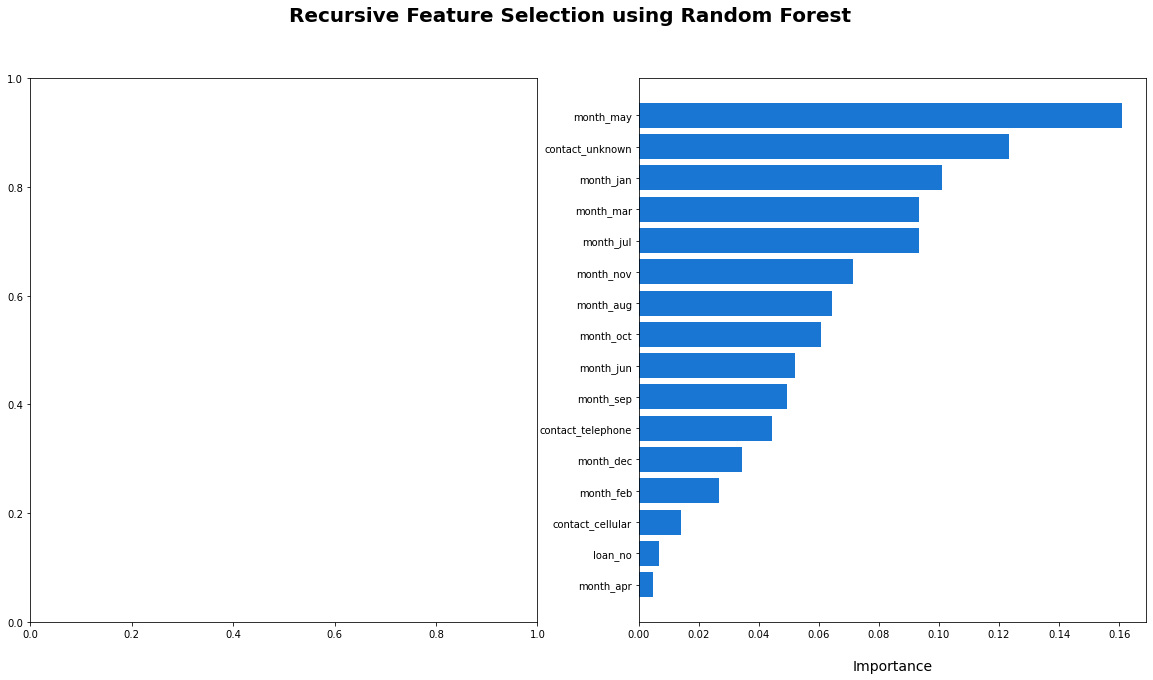

In [16]:
rocAuc_score = make_scorer(roc_auc_score)
rfeForest = XGBClassifier(n_estimators=100)
rfecv = RFECV(estimator=rfeForest, step=1, cv=StratifiedKFold(3),
              scoring=rocAuc_score, n_jobs=-1)
rfecv.fit(x_training, y_training)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
f, axs = plt.subplots(1,2,figsize =(20,10))
f.suptitle('Recursive Feature Selection using Random Forest', fontsize=20, fontweight='bold')
# axs[0].set_xlabel("Number of features selected")
# axs[0].set_ylabel("Cross validation score (F1-score)")
# axs[0].plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

#Plot feature importance of selected features
dset = pd.DataFrame()
dset['attr'] = x_training.columns[rfecv.support_]
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance')
axs[1].barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
axs[1].set_xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [17]:
x_training.columns[rfecv.support_]

Index(['loan_no', 'contact_cellular', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')